![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)

<a href="https://hub.callysto.ca/jupyter/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fcallysto%2Fshorts&branch=master&subPath=MatplotAnimation.ipynb&depth=1" target="_parent"><img src="https://raw.githubusercontent.com/callysto/curriculum-notebooks/master/open-in-callysto-button.svg?sanitize=true" width="123" height="24" alt="Open in Callysto"/></a>

# Animation in Matplotlib

An animated plot is just a series of plots that are linked together to work as a movie.

Matplotlib come with a rich collection of tools to allow us to make movies. In this notebook, we will give a simple example, to get you started. Read online to get many more examples and details. 

> WARNING. Some features here work better in web browser Firefox and Safari. Unfortunately, Chrome has problems due to its CORS policy (Cross Origin Resource Sharing.) We hope to resolve this soon. 

First we load in a bunch of modules that do the work in creating the animation. 

In [1]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
import matplotlib.animation as animation
from IPython.display import HTML

Next, we create a figure object using the subplot command, and define two functions "init" and "animate". Init() sets up the y-data in the plot for us, for the initial frame in the animation. Animate() defines the data for the series of plots we want to display.

In this case, we plot translates of the sine function. Animate(i) uses the variable i to count frames, and that i value determines how much we translate the sine function by. 

## Example 1
In this example, i will range from 0 to 99, giving a full cycle of the sine function. 

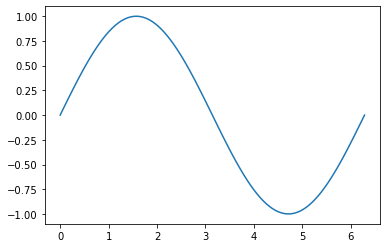

In [2]:
fig, ax = subplots()

x = linspace(0, 2*pi, 100)
line, = ax.plot(x, sin(x));


def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    return line,


def animate(i):
    line.set_ydata(sin(x + 2*pi*i / 100))  # update the data.
    return line,


Next, we call the animation function as follows, making use of the figure, init and animate functions defined above.

This creates a new data object call "ani" which holds the movie. 

In [3]:
ani = animation.FuncAnimation(
    fig, animate, init_func=init, interval=20, blit=True, save_count=100) 

Finally, we display the movie using the HTML() command from the module IPython.display.

In [4]:
HTML(ani.to_html5_video())

#### Example 2. Saving the movie

A simple "save" command turns the animation into an mp4 movie file, that you can use elsewhere. 

In [5]:
ani.save("movie.mp4")

#### Example 3. Playing the movie

Now that the movie is saved, we can just play it directly in html. This is a useful trick in case you have a movie that takes a long time to create. You can create and save, and let the next user just play the result.

> Note: Chrome may not work here. 

In [3]:
%%html
<iframe src="movie.mp4" width=600 height=400></iframe>

## In case of problems: ffmpeg

For the animations above to work, your computer system needs to have the ffmpeg package installed. You will get an error if you don't have it.

To install, you can open a terminal window in your Jupyter hub, and issue the following command:

```
    sudo apt-get install ffmpeg
```

Hopefully this gets you up and running. 

## Live Python Animation

Sometimes we want to have Python code running, and plotting a result at the same time. This is handy when creating complex animations and you don't want to use the complex methods above.

You do need to load in a couple of special commands, to control when the plot gets cleared and how quickly it is redrawn.

In [8]:
from IPython.display import clear_output
from time import sleep

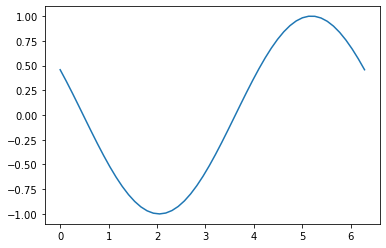

In [9]:
x = linspace(0,2*pi)   # the x axis values

for t in range(0,100):    # our animation loop
    plot(x,sin(x - t/10)) # plot a sine curve, shifted by t/10
    show()                # show the plot
    sleep(.1)             # wait for 0.1 seconds
    clear_output(wait=True) # then clear the plot and go to next one

## Caution

The above animation code is live, and running Python code. This means it will NOT work in a static webpage or HTML output. But it is great for when you are working with real code.

[![Callysto.ca License](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-bottom.jpg?raw=true)](https://github.com/callysto/curriculum-notebooks/blob/master/LICENSE.md)